# Assembly problem

Assembly is the intricate process of reconstructing a complete genome from shorter DNA sequences, known as reads, often achieved through identifying overlaps between pairs of reads. One of the primary challenges encountered in assembly is the task of finding the shortest common superstring. This superstring denotes the shortest sequence that encompasses all the given input strings, offering a unified representation of the genetic information contained within the reads.
1. Overlaps between reads
2. Shortest Common Superstring aims to find the shortest string that contains all the given input strings as substrings. This problem is NP-hard, making it computationally challenging.
3. Greedy Shortest Common Superstring employs a greedy approach by iteratively merging the two strings with the maximum overlap until no such overlaps exist, resulting in a superstring.
4. De Bruijn Graph Based represents sequences as nodes and overlaps as edges. By finding an Eulerian walk, which traverses each edge exactly once, researchers can reconstruct the original sequences efficiently. 

## 1. Overlap

In [7]:
from findOverlap import naive_overlap_map, overlap_all_pairs

reads = ['ACGGATC', 'GATCAAGT', 'TTCACGGA']
print(naive_overlap_map(reads, 3))

{('ACGGATC', 'GATCAAGT'): 4, ('TTCACGGA', 'ACGGATC'): 5}


In [22]:
#test
reads = ['CGTACG', 'TACGTA', 'GTACGT', 'ACGTAC', 'GTACGA', 'TACGAT']
overlaps_pair, count_overlap_reads = overlap_all_pairs(reads, 5)
print('all overlap pairs: {}'.format(len(overlaps_pair)))
print(overlaps_pair)
print('all overlap reads: {}'.format(len(count_overlap_reads)))
print(count_overlap_reads)

all overlap pairs: 6
[('CGTACG', 'GTACGA'), ('CGTACG', 'GTACGT'), ('TACGTA', 'ACGTAC'), ('GTACGT', 'TACGTA'), ('ACGTAC', 'CGTACG'), ('GTACGA', 'TACGAT')]
all overlap reads: 5
{'GTACGA', 'CGTACG', 'TACGTA', 'GTACGT', 'ACGTAC'}


In [18]:
from readFASTQ import readFASTQ
reads, _ = readFASTQ('ERR266411_1.first1000.fastq')
overlaps_pair, count_overlap_reads = overlap_all_pairs(reads, 30)
print('all overlap pairs: {}'.format(len(overlaps_pair)))
print('all overlap reads: {}'.format(len(count_overlap_reads)))

all overlap pairs: 46832
all overlap reads: 196


## 2. Shortest Common Superstring

In [83]:
from assembly_scs import scs_list

%time
string_set = ['ACGGATGAGC', 'GAGCGGA', 'GAGCGAG']
shortest_superstring = scs_list(string_set)
print("list of possible scs: {}".format(shortest_superstring))
print("Length of each superstring: {}".format(len(shortest_superstring[0])))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
list of possible scs: ['ACGGATGAGCGAGCGGA']
Length of each superstring: 17


In [84]:
%time
string_set = ['GAT', 'TAG', 'TCG', 'TGC', 'AAT', 'ATA']
shortest_superstring = scs_list(string_set)
print("list of possible scs: {}".format(shortest_superstring))
print("Length of each superstring: {}".format(len(shortest_superstring[0])))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs
list of possible scs: ['TCGATGCAATAG', 'TCGATAGAATGC', 'TCGAATAGATGC', 'TGCAATCGATAG', 'TGCAATAGATCG', 'AATCGATAGTGC', 'AATGCTCGATAG', 'AATAGATCGTGC', 'AATAGATGCTCG', 'AATAGTCGATGC']
Length of each superstring: 12


In [85]:
%time
string_set = ['ABCD', 'CDBC', 'BCDA']
shortest_superstring = scs_list(string_set)
print("list of possible scs: {}".format(shortest_superstring))
print("Length of each superstring: {}".format(len(shortest_superstring[0])))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs
list of possible scs: ['ABCDBCDA']
Length of each superstring: 8


## 3. Greedy Shortest Common Superstring

In [1]:
from assembly_greedy_scs import greedy_scs

%time
string_set = ['ACGGATGAGC', 'GAGCGGA', 'GAGCGAG']
shortest_superstring = greedy_scs(string_set, 2)
print("list of possible scs: {}".format(shortest_superstring))
print("Length of the first superstring: {}".format(len(shortest_superstring)))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 11 µs
list of possible scs: ACGGATGAGCGGAGCGAG
Length of the first superstring: 18


In [65]:
%time
string_set = ['GAT', 'TAG', 'TCG', 'TGC', 'AAT', 'ATA']
shortest_superstring = greedy_scs(string_set, 2)
print("list of possible scs: {}".format(shortest_superstring))
print("Length of the first superstring: {}".format(len(shortest_superstring)))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs
list of possible scs: TCGTGCAATGATAG
Length of the first superstring: 14


In [66]:
%time
string_set = ['ABCD', 'CDBC', 'BCDA']
shortest_superstring = greedy_scs(string_set, 2)
print("list of possible scs: {}".format(shortest_superstring))
print("Length of each superstring: {}".format(len(shortest_superstring)))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
list of possible scs: CDBCABCDA
Length of each superstring: 9


In [3]:
#read fastq file
from readFASTQ import readFASTQ
sequences, _ = readFASTQ('ads1_week4_reads.fq')

full_sequence = greedy_scs(sequences, 30)
print("Length of full sequence: {}".format(len(full_sequence)))

Length of full sequence: 15894


In [5]:
import collections
collections.Counter(full_sequence)

Counter({'A': 4633, 'C': 3789, 'G': 3749, 'T': 3723})

## 4. De Bruijn Graph

In [12]:
from assembly_de_bruijin_graph import de_bruijn_graph

nodes, edges = de_bruijn_graph("GCGCGCATTA", 3)
print(nodes)

{'CA', 'TA', 'TT', 'GC', 'CG', 'AT'}


In [13]:
print(edges)

[('GC', 'CG'), ('CG', 'GC'), ('GC', 'CG'), ('CG', 'GC'), ('GC', 'CA'), ('CA', 'AT'), ('AT', 'TT'), ('TT', 'TA')]


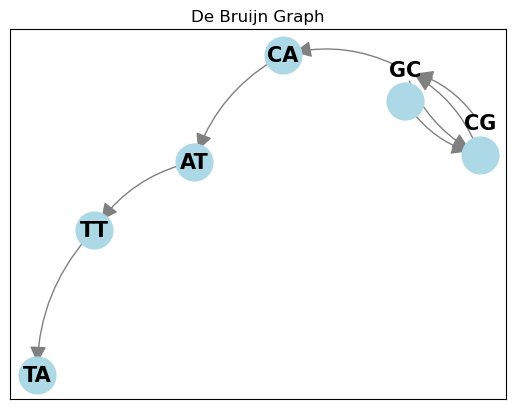

In [14]:
from assembly_de_bruijin_graph import visualize_de_bruijn_graph
visualize_de_bruijn_graph(nodes, edges)